In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [43]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
merged_all = pd.read_csv('/content/drive/MyDrive/[Data mining] data5cientists/Tiền xử lí/Dữ liệu đã được merged/merged_all.csv')

merged_all.head()

,Loại hợp đồng,Số người phụ thuộc,Địa chỉ thường trú,Ngành,Nghề nghiệp,Địa chỉ công ty (tỉnh thành),ID hợp đồng,Cân nặng,Trình độ học vấn,Doanh thu,...,Tiền phạt quá hạn (VND),Số ngày quá hạn hợp đồng,Khách hàng quá hạn (ngày),Ngày trả,Khoản trả,Trễ hạn (tháng),Lịch sử quá hạn (hợp đồng),Thanh toán (tháng),Lịch sử quá hạn (khách hàng),Nhóm quá hạn
0,4.00,1.00,35.00,18.00,NaN,NaN,"765,326.00",87.00,NaN,"12,264,000.00",...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,0.00,B0
1,4.00,1.00,35.00,18.00,NaN,NaN,"765,326.00",87.00,NaN,"12,264,000.00",...,0.00,0.00,0.00,2022-07-08 00:00:00.000,588.78,0.00,0.00,1.00,0.00,B0
2,4.00,1.00,35.00,18.00,NaN,NaN,"765,326.00",87.00,NaN,"12,264,000.00",...,0.00,0.00,0.00,2022-08-08 00:00:00.000,585.95,0.00,0.00,2.00,0.00,B0
3,4.00,1.00,35.00,18.00,NaN,NaN,"765,326.00",87.00,NaN,"12,264,000.00",...,0.00,0.00,0.00,2022-09-12 00:00:00.000,583.10,1.00,2.00,3.00,2.00,B0
4,4.00,1.00,35.00,18.00,NaN,NaN,"765,326.00",87.00,NaN,"12,264,000.00",...,0.00,0.00,0.00,2022-10-03 00:00:00.000,584.52,1.00,2.00,4.00,2.00,B0


In [13]:
merged_origin_repayment = pd.read_csv('/content/drive/MyDrive/[Data mining] data5cientists/Tiền xử lí/Dữ liệu đã được merged/merged_origin_repayment.csv')
merged_origin_repayment

,Kênh thanh toán,Mức thanh khoản,Công ty bảo hiểm,Mức bảo hiểm,Ngày thanh toán,ID hợp đồng,Mức vay,Có bảo hiểm,Hình thức vay,kì hạn vay,...,Tiền phạt quá hạn (VND),Số ngày quá hạn hợp đồng,Khách hàng quá hạn (ngày),Ngày trả,Khoản trả,Trễ hạn (tháng),Lịch sử quá hạn (hợp đồng),Thanh toán (tháng),Lịch sử quá hạn (khách hàng),Nhóm quá hạn
0,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,0.00,B0
1,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,0.00,0.00,0.00,2022-07-08 00:00:00.000,588.78,0.00,0.00,1.00,0.00,B0
2,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,0.00,0.00,0.00,2022-08-08 00:00:00.000,585.95,0.00,0.00,2.00,0.00,B0
3,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,0.00,0.00,0.00,2022-09-12 00:00:00.000,583.10,1.00,2.00,3.00,2.00,B0
4,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,0.00,0.00,0.00,2022-10-03 00:00:00.000,584.52,1.00,2.00,4.00,2.00,B0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967537,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,0.00,133.00,133.00,2022-12-19 00:00:00.000,753.66,4.00,133.00,8.00,133.00,B6
967538,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,0.00,163.00,163.00,2022-12-19 00:00:00.000,753.66,4.00,163.00,9.00,163.00,B7
967539,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,0.00,194.00,194.00,2022-12-19 00:00:00.000,753.66,4.00,194.00,10.00,194.00,B8
967540,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,0.00,225.00,225.00,2022-12-19 00:00:00.000,753.66,4.00,225.00,11.00,225.00,B9


### **1.Delinquency Moving Matrix (DMM)**

---


Theo dõi sự dịch chuyển nhóm quá hạn (B0 → B14) của cùng một hợp đồng giữa ha thời điểm MOB (Số tháng kể từ khi khoản vay/hợp đồng bắt đầu được giải ngân)

In [14]:
def delinquency_moving_matrix(
    dataset: pd.DataFrame,
    after_mob1: int,
    after_mob2: int
) -> np.ndarray:
    """
    Hàm tính Delinquency Moving Matrix (DMM)
    - after_mob1: MOB tại thời điểm đầu
    - after_mob2: MOB tại thời điểm sau
    """

    # Lọc dữ liệu tại MOB 1 và MOB 2
    mob1 = dataset[dataset['Thanh toán (tháng)'] == after_mob1]
    mob2 = dataset[dataset['Thanh toán (tháng)'] == after_mob2]

    # Ghép 2 thời điểm theo ID hợp đồng
    merge_mob = mob1.merge(
        right=mob2,
        on='ID hợp đồng'
    )

    # Khởi tạo ma trận 15x15 (B0 → B14)
    dmm = np.zeros(shape=(15, 15))

    # Đếm số hợp đồng dịch chuyển từ Bi → Bj
    for i in range(15):
        for j in range(15):
            count = merge_mob[
                (merge_mob['Nhóm quá hạn_x'] == f'B{i}') &
                (merge_mob['Nhóm quá hạn_y'] == f'B{j}')
            ][['Nhóm quá hạn_x', 'Nhóm quá hạn_y']].value_counts().values

            dmm[i, j] = count[0] if len(count) else 0

    # Tổng số hợp đồng tại từng bucket ban đầu
    bucket_sum = np.sum(dmm, axis=1)

    # Chuẩn hóa về %
    for i in range(15):
        for j in range(15):
            dmm[i, j] = 0 if dmm[i, j] == 0 else dmm[i, j] / bucket_sum[i] * 100

    return dmm


In [15]:
#Tạo DMM từ MOB 3 → MOB 9
dmm = delinquency_moving_matrix(
    merged_origin_repayment,
    after_mob1=3,
    after_mob2=9
)
dmm

array([[6.86815403e+01, 7.69541068e-01, 5.61796010e+00, 4.88100040e+00,
        4.91668477e+00, 4.80032271e+00, 4.72895398e+00, 5.17268129e+00,
        4.31315357e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.54545455e+00, 2.90909091e+00, 2.00000000e+00, 5.45454545e+00,
        3.45454545e+00, 6.72727273e+00, 8.72727273e+00, 1.65454545e+01,
        4.96363636e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.94917345e+00, 2.96076980e-01, 2.78805823e+00, 1.67776955e+00,
        2.71403898e+00, 4.02171231e+00, 6.78509746e+00, 1.35208488e+01,
        6.07698001e+01, 5.47742413e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.41310541e-01, 5.69800570e-02, 3.70370370e-01, 3.70370370e-01,
        5.41310541e-01, 1.19658120e+00, 1.93732194e+00, 3.30484330e+00,
        5.04273504e+00, 7.98860399e+0

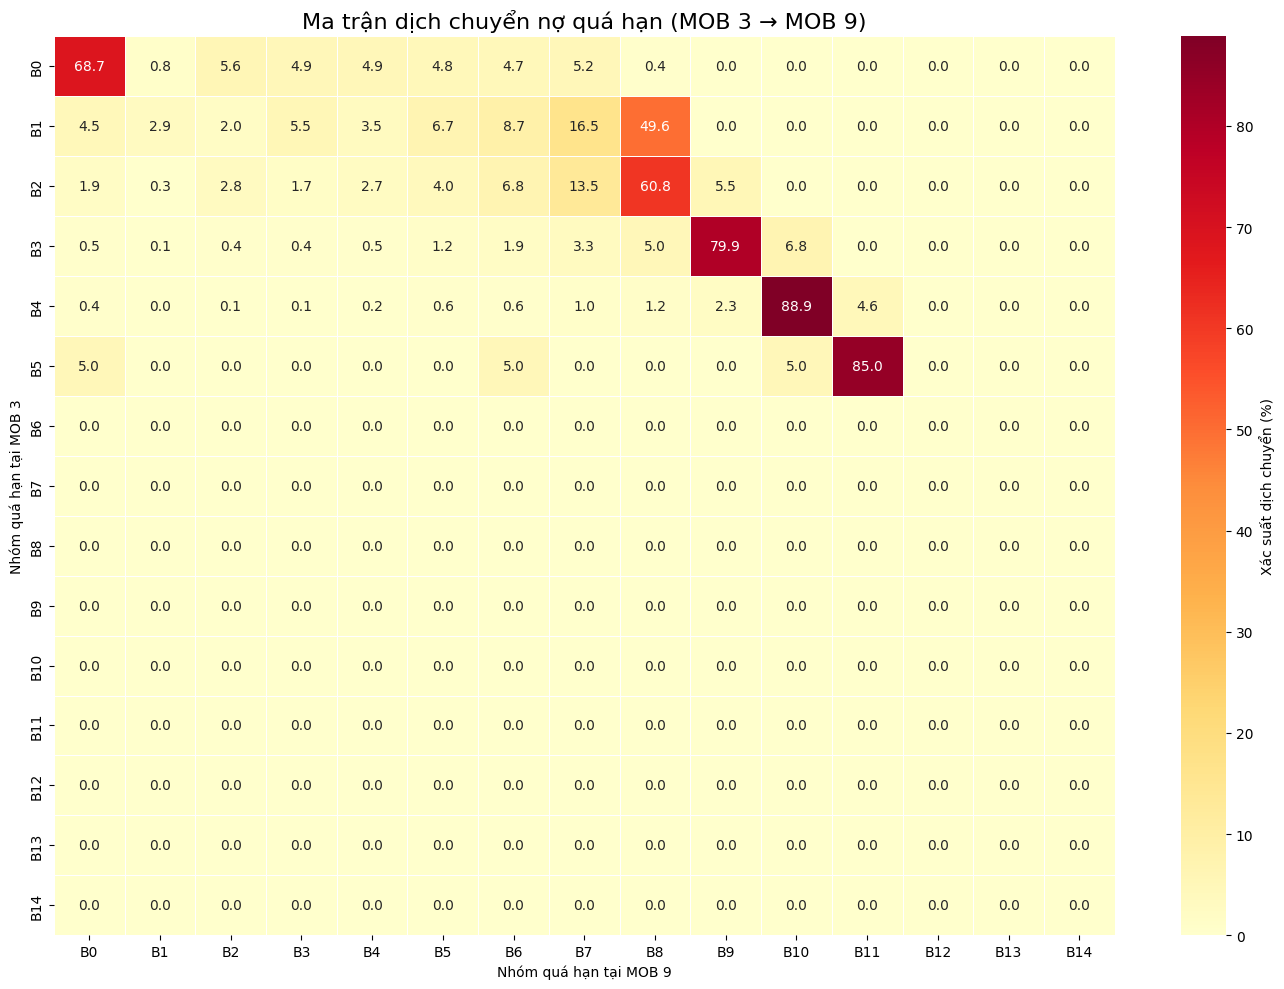

In [16]:
nhan_bucket_15 = [f'B{i}' for i in range(15)]
nhan_bucket_6  = [f'B{i}' for i in range(6)]

plt.figure(figsize=(14, 10))

sns.heatmap(
    dmm,
    cmap="YlOrRd",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    xticklabels=nhan_bucket_15,
    yticklabels=nhan_bucket_15,
    cbar_kws={"label": "Xác suất dịch chuyển (%)"}
)

plt.title("Ma trận dịch chuyển nợ quá hạn (MOB 3 → MOB 9)", fontsize=16)
plt.xlabel("Nhóm quá hạn tại MOB 9")
plt.ylabel("Nhóm quá hạn tại MOB 3")
plt.tight_layout()
plt.show()


In [17]:
# Gộp nhóm B5 trở lên & rút gọn ma trận
# Gộp các bucket >= B5
dmm[:, 5] = np.sum(dmm[:, 5:], axis=1)

# Giữ lại B0 → B5
dmm = dmm[:6, :6]
dmm


array([[6.86815403e+01, 7.69541068e-01, 5.61796010e+00, 4.88100040e+00,
        4.91668477e+00, 1.51332733e+01],
       [4.54545455e+00, 2.90909091e+00, 2.00000000e+00, 5.45454545e+00,
        3.45454545e+00, 8.16363636e+01],
       [1.94917345e+00, 2.96076980e-01, 2.78805823e+00, 1.67776955e+00,
        2.71403898e+00, 9.05748828e+01],
       [5.41310541e-01, 5.69800570e-02, 3.70370370e-01, 3.70370370e-01,
        5.41310541e-01, 9.81196581e+01],
       [4.34782609e-01, 0.00000000e+00, 5.43478261e-02, 5.43478261e-02,
        2.17391304e-01, 9.92391304e+01],
       [5.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.50000000e+01]])

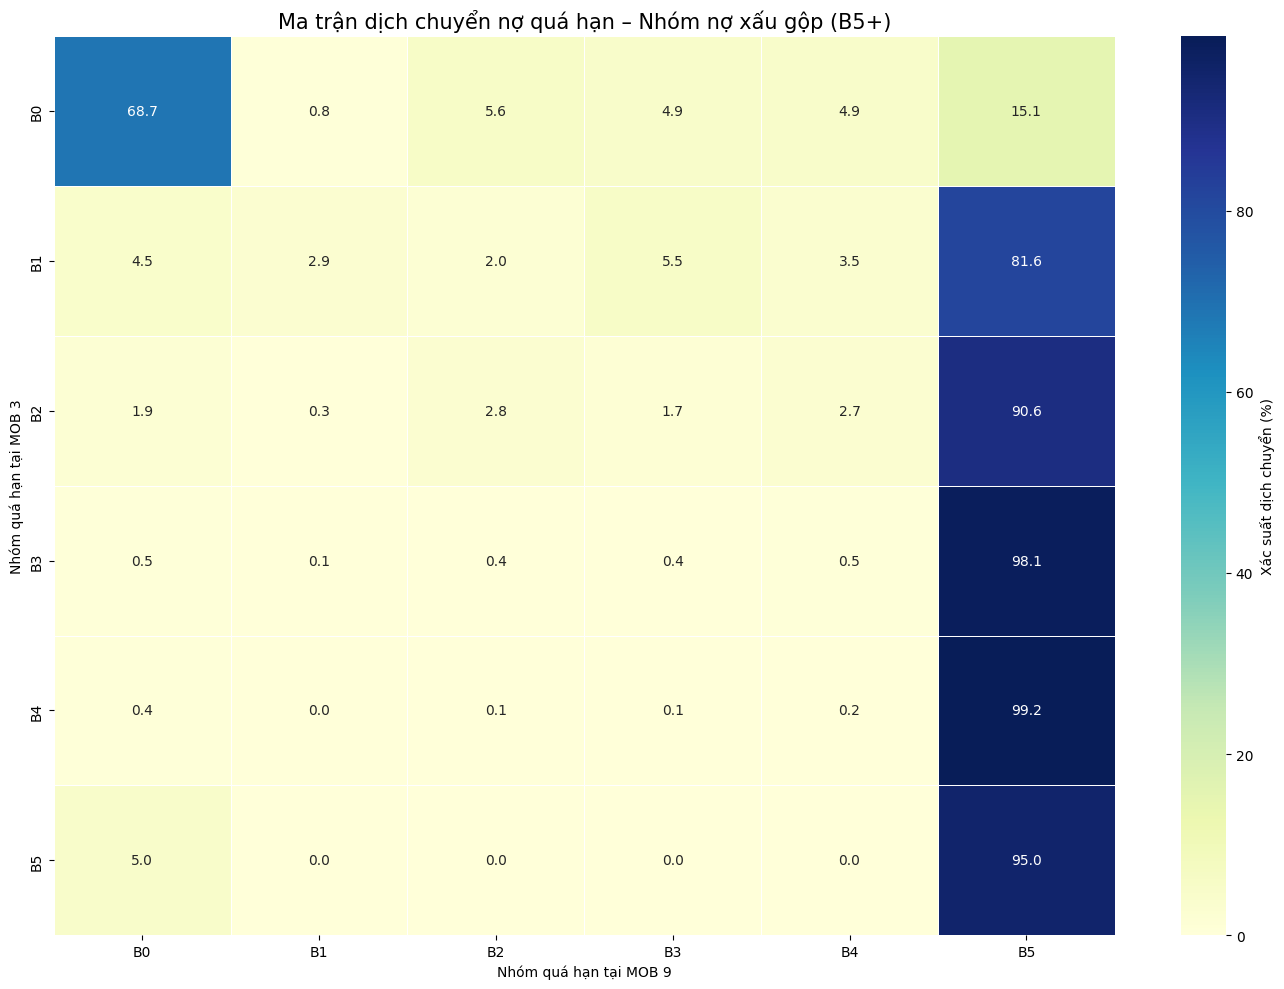

In [18]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    dmm,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    xticklabels=nhan_bucket_6,
    yticklabels=nhan_bucket_6,
    cbar_kws={"label": "Xác suất dịch chuyển (%)"}
)

plt.title("Ma trận dịch chuyển nợ quá hạn – Nhóm nợ xấu gộp (B5+)", fontsize=15)
plt.xlabel("Nhóm quá hạn tại MOB 9")
plt.ylabel("Nhóm quá hạn tại MOB 3")
plt.tight_layout()
plt.show()


In [19]:
dmm1=delinquency_moving_matrix(
    merged_origin_repayment,
    after_mob1=9,
    after_mob2=12
)


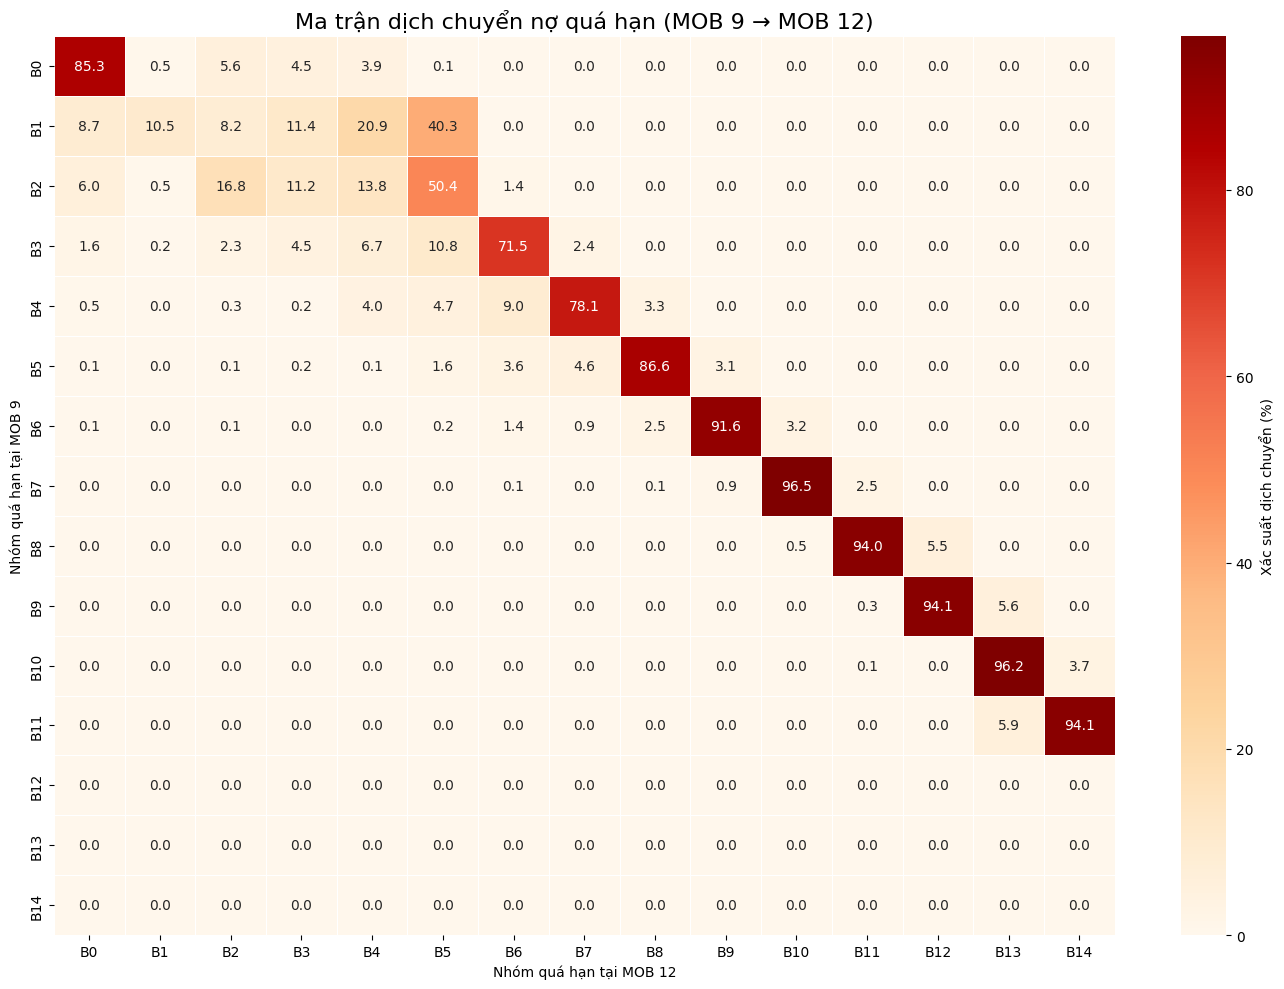

In [20]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    dmm1,
    cmap="OrRd",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    xticklabels=nhan_bucket_15,
    yticklabels=nhan_bucket_15,
    cbar_kws={"label": "Xác suất dịch chuyển (%)"}
)

plt.title("Ma trận dịch chuyển nợ quá hạn (MOB 9 → MOB 12)", fontsize=16)
plt.xlabel("Nhóm quá hạn tại MOB 12")
plt.ylabel("Nhóm quá hạn tại MOB 9")
plt.tight_layout()
plt.show()

### **2. Monthly Roll Rate – B0 → Non-B0**
---
Tính tỷ lệ hợp đồng từ B0 chuyển sang nợ xấu trong tháng kế tiếp





In [21]:
#Đếm số hợp đồng chưa từng bị quá hạn.
so_hd_khong_qua_han=np.sum(
    merged_origin_repayment
    .groupby('ID hợp đồng')['Số ngày quá hạn hợp đồng']
    .max()
    .values == 0
)
tong_hd = merged_origin_repayment['ID hợp đồng'].nunique()
so_hd_tung_qua_han = tong_hd - so_hd_khong_qua_han

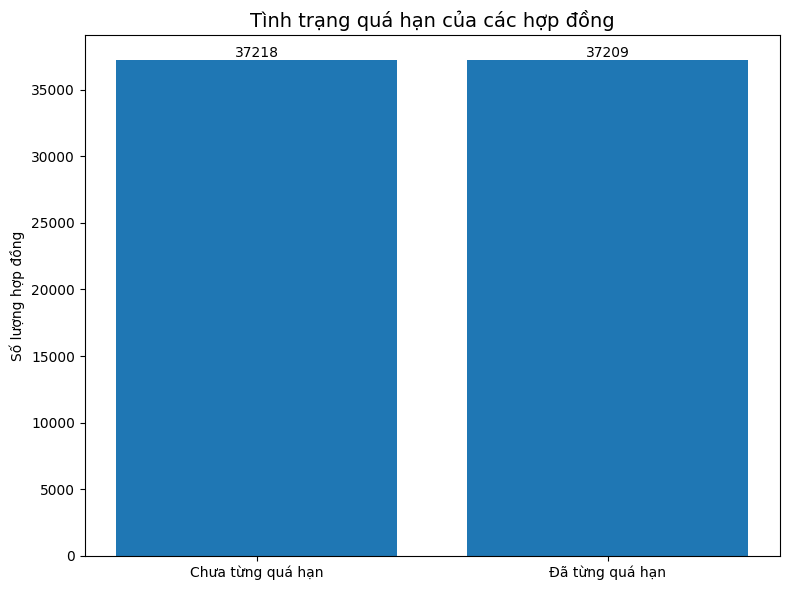

In [22]:

labels = ['Chưa từng quá hạn', 'Đã từng quá hạn']
values = [so_hd_khong_qua_han, so_hd_tung_qua_han]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values)

plt.title('Tình trạng quá hạn của các hợp đồng', fontsize=14)
plt.ylabel('Số lượng hợp đồng')

# Hiển thị số lên đầu cột
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


In [23]:
temp3 = merged_origin_repayment.copy()

# Chuyển Ngày xuất data sang datetime
temp3['Ngày xuất data'] = pd.to_datetime(
    temp3['Ngày xuất data'],
    format='%Y-%m'
)

# Tách tháng & năm
temp3['THÁNG_XUẤT_DATA'] = temp3['Ngày xuất data'].dt.month
temp3['NĂM_XUẤT_DATA'] = temp3['Ngày xuất data'].dt.year

# Xác định tháng & năm kế tiếp
temp3['THÁNG_XUẤT_DATA_KẾ_TIẾP'] = np.where(
    temp3['THÁNG_XUẤT_DATA'] < 12,
    temp3['THÁNG_XUẤT_DATA'] + 1,
    1
)

temp3['NĂM_XUẤT_DATA_KẾ_TIẾP'] = np.where(
    temp3['THÁNG_XUẤT_DATA'] < 12,
    temp3['NĂM_XUẤT_DATA'],
    temp3['NĂM_XUẤT_DATA'] + 1
)

# Đưa Ngày xuất data về dạng YYYY-MM
temp3['Ngày xuất data'] = temp3['Ngày xuất data'].dt.strftime('%Y-%m')

temp3

,Kênh thanh toán,Mức thanh khoản,Công ty bảo hiểm,Mức bảo hiểm,Ngày thanh toán,ID hợp đồng,Mức vay,Có bảo hiểm,Hình thức vay,kì hạn vay,...,Khoản trả,Trễ hạn (tháng),Lịch sử quá hạn (hợp đồng),Thanh toán (tháng),Lịch sử quá hạn (khách hàng),Nhóm quá hạn,THÁNG_XUẤT_DATA,NĂM_XUẤT_DATA,THÁNG_XUẤT_DATA_KẾ_TIẾP,NĂM_XUẤT_DATA_KẾ_TIẾP
0,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,NaN,NaN,NaN,0.00,0.00,B0,6,2022,7,2022
1,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,588.78,0.00,0.00,1.00,0.00,B0,7,2022,8,2022
2,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,585.95,0.00,0.00,2.00,0.00,B0,8,2022,9,2022
3,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,583.10,1.00,2.00,3.00,2.00,B0,9,2022,10,2022
4,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,584.52,1.00,2.00,4.00,2.00,B0,10,2022,11,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967537,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,753.66,4.00,133.00,8.00,133.00,B6,5,2023,6,2023
967538,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,753.66,4.00,163.00,9.00,163.00,B7,6,2023,7,2023
967539,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,753.66,4.00,194.00,10.00,194.00,B8,7,2023,8,2023
967540,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,753.66,4.00,225.00,11.00,225.00,B9,8,2023,9,2023


In [24]:
# Tự ghép (self-join) bảng temp3 để nối dữ liệu của CÙNG MỘT HỢP ĐỒNG
# giữa THÁNG HIỆN TẠI và THÁNG KẾ TIẾP (T → T+1).
# Mục đích: theo dõi sự thay đổi trạng thái của hợp đồng theo thời gian
temp4 = temp3.merge(
    right=temp3,
    left_on=['ID hợp đồng', 'THÁNG_XUẤT_DATA_KẾ_TIẾP', 'NĂM_XUẤT_DATA_KẾ_TIẾP'],
    right_on=['ID hợp đồng', 'THÁNG_XUẤT_DATA', 'NĂM_XUẤT_DATA']
)
temp4


,Kênh thanh toán_x,Mức thanh khoản_x,Công ty bảo hiểm_x,Mức bảo hiểm_x,Ngày thanh toán_x,ID hợp đồng,Mức vay_x,Có bảo hiểm_x,Hình thức vay_x,kì hạn vay_x,...,Khoản trả_y,Trễ hạn (tháng)_y,Lịch sử quá hạn (hợp đồng)_y,Thanh toán (tháng)_y,Lịch sử quá hạn (khách hàng)_y,Nhóm quá hạn_y,THÁNG_XUẤT_DATA_y,NĂM_XUẤT_DATA_y,THÁNG_XUẤT_DATA_KẾ_TIẾP_y,NĂM_XUẤT_DATA_KẾ_TIẾP_y
0,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,588.78,0.00,0.00,1.00,0.00,B0,7,2022,8,2022
1,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,585.95,0.00,0.00,2.00,0.00,B0,8,2022,9,2022
2,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,583.10,1.00,2.00,3.00,2.00,B0,9,2022,10,2022
3,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,584.52,1.00,2.00,4.00,2.00,B0,10,2022,11,2022
4,NaN,5.00,0.00,3.00,2022-06,"765,326.00",2.00,YES,6.00,24.00,...,584.81,1.00,2.00,5.00,4.00,B0,11,2022,12,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893110,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,753.66,4.00,133.00,8.00,133.00,B6,5,2023,6,2023
893111,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,753.66,4.00,163.00,9.00,163.00,B7,6,2023,7,2023
893112,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,753.66,4.00,194.00,10.00,194.00,B8,7,2023,8,2023
893113,4.00,NaN,NaN,0.75,NaN,"854,538.00",1.00,YES,12.00,6.00,...,753.66,4.00,225.00,11.00,225.00,B9,8,2023,9,2023


In [25]:
# Lọc các hợp đồng đang ở NHÓM B0 (đúng hạn) tại kỳ trước (_x)
# nhưng CHUYỂN SANG NHÓM KHÁC B0 tại kỳ sau (_y),tức là các hợp đồng bắt đầu PHÁT SINH QUÁ HẠN.
# Sau đó, đếm số lượng HỢP ĐỒNG DUY NHẤT theo từng ngày xuất dữ liệu
# Dùng theo dõi xu hướng phát sinh quá hạn theo thời gian.

temp5 = temp4[
    (temp4['Nhóm quá hạn_x'] == 'B0') &
    (temp4['Nhóm quá hạn_y'] != 'B0')
].groupby(
    by='Ngày xuất data_y',
    as_index=False
)['ID hợp đồng'].nunique()
temp5

,Ngày xuất data_y,ID hợp đồng
0,2022-04,193
1,2022-05,424
2,2022-06,658
3,2022-07,750
4,2022-08,1155
5,2022-09,2007
6,2022-10,2284
7,2022-11,2642
8,2022-12,3294
9,2023-01,4265


In [26]:
# Lọc các hợp đồng đang ở NHÓM B0 (đúng hạn) tại kỳ trước (_x),
# sau đó đếm số lượng HỢP ĐỒNG DUY NHẤT theo từng cặp
# (ngày xuất data kỳ trước, ngày xuất data kỳ sau).
# Mục đích: theo dõi quy mô tập hợp các hợp đồng ĐANG TỐT (B0) được mang sang kỳ kế tiếp, làm mẫu số để phân tích tỷ lệ phát sinh quá hạn.
temp6 = temp4[
    temp4['Nhóm quá hạn_x'] == 'B0'
].groupby(
    by=['Ngày xuất data_x', 'Ngày xuất data_y'],
    as_index=False
)['ID hợp đồng'].nunique()
temp6

,Ngày xuất data_x,Ngày xuất data_y,ID hợp đồng
0,2022-03,2022-04,5358
1,2022-04,2022-05,11036
2,2022-05,2022-06,16396
3,2022-06,2022-07,21290
4,2022-07,2022-08,26435
5,2022-08,2022-09,32401
6,2022-09,2022-10,37032
7,2022-10,2022-11,41557
8,2022-11,2022-12,47224
9,2022-12,2023-01,50348


In [27]:
# Ghép dữ liệu số hợp đồng PHÁT SINH QUÁ HẠN (B0 → Bx)
# với tổng số hợp đồng ĐANG Ở B0 tại kỳ trước,
# theo cùng NGÀY XUẤT DATA KỲ SAU.
# Mục đích: tạo tử số và mẫu số để tính ROLL RATE theo tháng.

temp7 = temp5.merge(
    right=temp6,
    on='Ngày xuất data_y'
)

# Tính TỶ LỆ ROLL RATE THÁNG:
# = (Số hợp đồng từ B0 chuyển sang quá hạn trong tháng)
#   / (Tổng số hợp đồng đang ở B0 tại đầu kỳ)
#   * 100 (%)
# Chỉ số này phản ánh MỨC ĐỘ PHÁT SINH QUÁ HẠN HÀNG THÁNG.

temp7['TỶ_LỆ_ROLL_RATE_THÁNG'] = (
    temp7['ID hợp đồng_x'] /
    temp7['ID hợp đồng_y'] * 100
)

# Lấy kết quả cuối cùng: Roll rate theo từng tháng
temp7[['Ngày xuất data_y', 'TỶ_LỆ_ROLL_RATE_THÁNG']]

,Ngày xuất data_y,TỶ_LỆ_ROLL_RATE_THÁNG
0,2022-04,3.60
1,2022-05,3.84
2,2022-06,4.01
3,2022-07,3.52
4,2022-08,4.37
5,2022-09,6.19
6,2022-10,6.17
7,2022-11,6.36
8,2022-12,6.98
9,2023-01,8.47


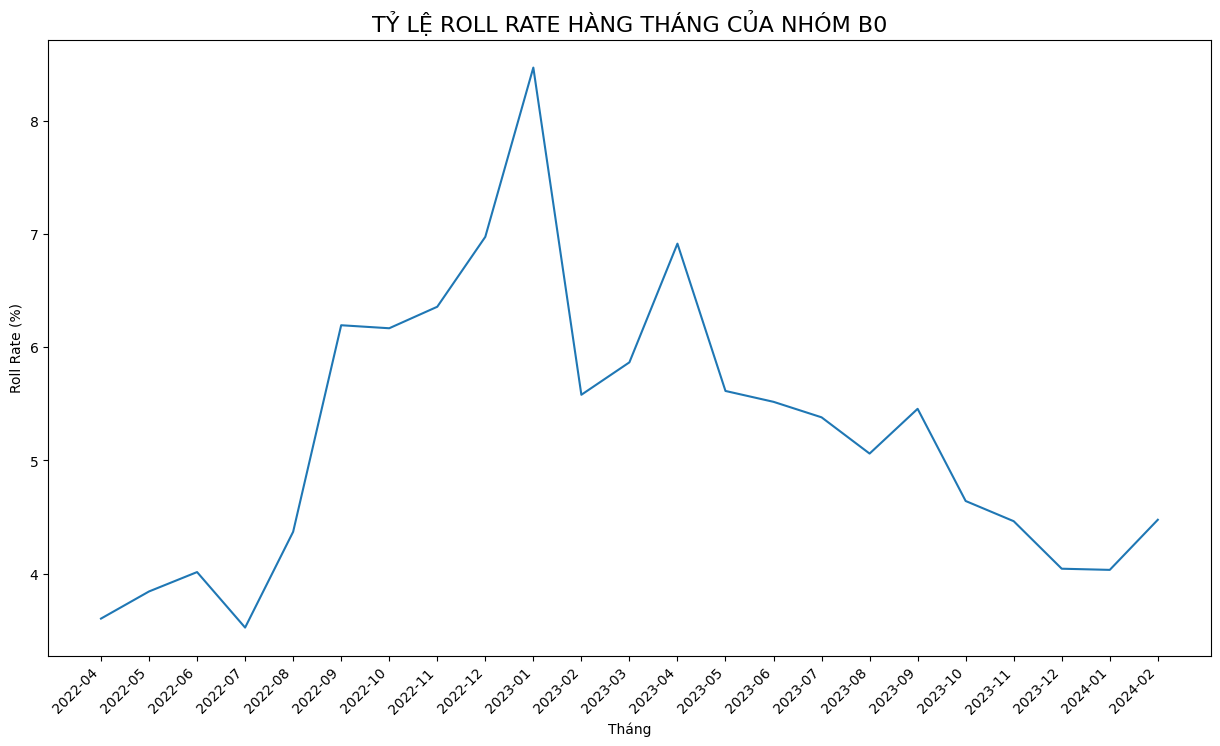

In [28]:
plt.figure(figsize=(15, 8))

sns.lineplot(
    data=temp7,
    x='Ngày xuất data_y',
    y='TỶ_LỆ_ROLL_RATE_THÁNG'
)

plt.xticks(rotation=45, ha='right')
plt.title('TỶ LỆ ROLL RATE HÀNG THÁNG CỦA NHÓM B0', fontsize=16)
plt.xlabel('Tháng')
plt.ylabel('Roll Rate (%)')
plt.show()


### **3. Roll Rate theo phân khúc thu nhập**

In [29]:
temp8 = merged_all.copy()

# Chuyển Ngày xuất data sang datetime
temp8['Ngày xuất data'] = pd.to_datetime(
    temp8['Ngày xuất data'],
    format='%Y-%m'
)

# Tách tháng & năm
temp8['THÁNG_XUẤT_DATA'] = temp8['Ngày xuất data'].dt.month
temp8['NĂM_XUẤT_DATA'] = temp8['Ngày xuất data'].dt.year

# Xác định tháng & năm kế tiếp
temp8['THÁNG_KẾ_TIẾP'] = np.where(
    temp8['THÁNG_XUẤT_DATA'] < 12,
    temp8['THÁNG_XUẤT_DATA'] + 1,
    1
)

temp8['NĂM_KẾ_TIẾP'] = np.where(
    temp8['THÁNG_XUẤT_DATA'] < 12,
    temp8['NĂM_XUẤT_DATA'],
    temp8['NĂM_XUẤT_DATA'] + 1
)

# Đưa về dạng YYYY-MM
temp8['Ngày xuất data'] = temp8['Ngày xuất data'].dt.strftime('%Y-%m')
# Kết quả: bảng dữ liệu có đầy đủ thông tin kỳ hiện tại (T)
# và kỳ kế tiếp (T+1) cho từng hợp đồng
temp8


,Loại hợp đồng,Số người phụ thuộc,Địa chỉ thường trú,Ngành,Nghề nghiệp,Địa chỉ công ty (tỉnh thành),ID hợp đồng,Cân nặng,Trình độ học vấn,Doanh thu,...,Khoản trả,Trễ hạn (tháng),Lịch sử quá hạn (hợp đồng),Thanh toán (tháng),Lịch sử quá hạn (khách hàng),Nhóm quá hạn,THÁNG_XUẤT_DATA,NĂM_XUẤT_DATA,THÁNG_KẾ_TIẾP,NĂM_KẾ_TIẾP
0,4.00,1.00,35.00,18.00,NaN,NaN,"765,326.00",87.00,NaN,"12,264,000.00",...,NaN,NaN,NaN,0.00,0.00,B0,6,2022,7,2022
1,4.00,1.00,35.00,18.00,NaN,NaN,"765,326.00",87.00,NaN,"12,264,000.00",...,588.78,0.00,0.00,1.00,0.00,B0,7,2022,8,2022
2,4.00,1.00,35.00,18.00,NaN,NaN,"765,326.00",87.00,NaN,"12,264,000.00",...,585.95,0.00,0.00,2.00,0.00,B0,8,2022,9,2022
3,4.00,1.00,35.00,18.00,NaN,NaN,"765,326.00",87.00,NaN,"12,264,000.00",...,583.10,1.00,2.00,3.00,2.00,B0,9,2022,10,2022
4,4.00,1.00,35.00,18.00,NaN,NaN,"765,326.00",87.00,NaN,"12,264,000.00",...,584.52,1.00,2.00,4.00,2.00,B0,10,2022,11,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697165,4.00,0.00,51.00,18.00,NaN,NaN,"779,206.00",79.00,1.00,"15,413,000.00",...,18.26,6.00,133.00,8.00,133.00,B6,6,2023,7,2023
697166,4.00,0.00,51.00,18.00,NaN,NaN,"779,206.00",79.00,1.00,"15,413,000.00",...,18.26,7.00,164.00,9.00,164.00,B7,7,2023,8,2023
697167,4.00,0.00,51.00,18.00,NaN,NaN,"779,206.00",79.00,1.00,"15,413,000.00",...,18.26,8.00,195.00,10.00,195.00,B8,8,2023,9,2023
697168,4.00,0.00,51.00,18.00,NaN,NaN,"779,206.00",79.00,1.00,"15,413,000.00",...,18.26,9.00,225.00,11.00,225.00,B9,9,2023,10,2023


In [30]:
# Thực hiện self-join (tự ghép bảng) trên temp8 để nối dữ liệu của CÙNG MỘT HỢP ĐỒNG
# giữa KỲ HIỆN TẠI (T) và KỲ KẾ TIẾP (T+1) theo THÁNG/NĂM.
# - Bên trái: sử dụng THÁNG_KẾ_TIẾP và NĂM_KẾ_TIẾP (đại diện cho kỳ T+1)
# - Bên phải: sử dụng THÁNG_XUẤT_DATA và NĂM_XUẤT_DATA (đại diện cho kỳ T)
# Mục đích: tạo cặp dữ liệu T → T+1 cho mỗi hợp đồng
# để theo dõi sự thay đổi trạng thái theo thời gian
temp9 = temp8.merge(
    right=temp8,
    left_on=['ID hợp đồng', 'THÁNG_KẾ_TIẾP', 'NĂM_KẾ_TIẾP'],
    right_on=['ID hợp đồng', 'THÁNG_XUẤT_DATA', 'NĂM_XUẤT_DATA']
)

In [31]:
# Lọc các hợp đồng đang ở NHÓM B0 (đúng hạn) tại kỳ trước (_x)
# nhưng CHUYỂN SANG NHÓM KHÁC B0 tại kỳ sau (_y),
# tức là các hợp đồng PHÁT SINH QUÁ HẠN trong kỳ kế tiếp.
# Sau đó, nhóm theo:
# - Ngày xuất data kỳ sau (thời điểm phát sinh quá hạn)
# - Phân lớp doanh thu tại kỳ trước
# và đếm số lượng HỢP ĐỒNG DUY NHẤT.
# Mục đích: phân tích số hợp đồng từ B0 chuyển sang quá hạn
# theo từng phân khúc doanh thu.

temp10 = temp9[
    (temp9['Nhóm quá hạn_x'] == 'B0') &
    (temp9['Nhóm quá hạn_y'] != 'B0')
].groupby(
    by=['Ngày xuất data_y', 'Phân lớp doanh thu_x'],
    as_index=False
)['ID hợp đồng'].nunique()

temp10

,Ngày xuất data_y,Phân lớp doanh thu_x,ID hợp đồng
0,2022-04,Cao,81
1,2022-04,Thấp,5
2,2022-04,Trung bình,8
3,2022-04,Trung bình cao,21
4,2022-05,Cao,189
...,...,...,...
87,2024-01,Trung bình cao,19
88,2024-02,Cao,56
89,2024-02,Thấp,6
90,2024-02,Trung bình,4


In [32]:
# Lọc các hợp đồng đang ở NHÓM B0 (đúng hạn) tại kỳ trước (_x),
# sau đó nhóm theo:
# - Ngày xuất data kỳ trước
# - Ngày xuất data kỳ sau
# - Phân lớp doanh thu tại kỳ trước
# và đếm số lượng HỢP ĐỒNG DUY NHẤT.
# Mục đích: xác định quy mô tập hợp các hợp đồng ĐANG TỐT (B0) theo từng phân lớp doanh thu ở mỗi cặp kỳ liên tiếp,
# làm MẪU SỐ để tính tỷ lệ roll rate theo phân khúc doanh thu.


temp11 = temp9[
    temp9['Nhóm quá hạn_x'] == 'B0'
].groupby(
    by=['Ngày xuất data_x', 'Ngày xuất data_y', 'Phân lớp doanh thu_x'],
    as_index=False
)['ID hợp đồng'].nunique()

temp11

,Ngày xuất data_x,Ngày xuất data_y,Phân lớp doanh thu_x,ID hợp đồng
0,2022-03,2022-04,Cao,2499
1,2022-03,2022-04,Thấp,42
2,2022-03,2022-04,Trung bình,283
3,2022-03,2022-04,Trung bình cao,509
4,2022-04,2022-05,Cao,5139
...,...,...,...,...
87,2023-12,2024-01,Trung bình cao,431
88,2024-01,2024-02,Cao,1317
89,2024-01,2024-02,Thấp,112
90,2024-01,2024-02,Trung bình,103


In [33]:
# - TỬ SỐ: số hợp đồng từ B0 chuyển sang quá hạn trong kỳ
#          (theo từng ngày và phân lớp doanh thu)
# - MẪU SỐ: tổng số hợp đồng đang ở B0 tại đầu kỳ
#           (theo cùng ngày và phân lớp doanh thu)
# Mục đích: tạo đủ thông tin để tính ROLL RATE theo tháng
# cho từng phân khúc doanh thu.
temp12 = temp10.merge(
    right=temp11,
    on=['Ngày xuất data_y', 'Phân lớp doanh thu_x']
)

# Tính ROLL RATE THEO THÁNG (%):
# = (Số hợp đồng B0 chuyển sang quá hạn trong kỳ)
#   / (Tổng số hợp đồng B0 tại đầu kỳ)
#   * 100
# Chỉ số này phản ánh MỨC ĐỘ PHÁT SINH QUÁ HẠN
# của từng phân lớp doanh thu theo thời gian.
temp12['MONTHLY_ROLL_RATE'] = (
    temp12['ID hợp đồng_x'] /
    temp12['ID hợp đồng_y'] * 100
)

temp12


,Ngày xuất data_y,Phân lớp doanh thu_x,ID hợp đồng_x,Ngày xuất data_x,ID hợp đồng_y,MONTHLY_ROLL_RATE
0,2022-04,Cao,81,2022-03,2499,3.24
1,2022-04,Thấp,5,2022-03,42,11.90
2,2022-04,Trung bình,8,2022-03,283,2.83
3,2022-04,Trung bình cao,21,2022-03,509,4.13
4,2022-05,Cao,189,2022-04,5139,3.68
...,...,...,...,...,...,...
87,2024-01,Trung bình cao,19,2023-12,431,4.41
88,2024-02,Cao,56,2024-01,1317,4.25
89,2024-02,Thấp,6,2024-01,112,5.36
90,2024-02,Trung bình,4,2024-01,103,3.88


In [34]:
# Bước 1: Tính TỔNG SỐ HỢP ĐỒNG đang ở B0 tại đầu kỳ
# (gộp TẤT CẢ các phân lớp doanh thu) theo từng ngày xuất data kỳ sau.
# Đây là MẪU SỐ để tính roll rate toàn danh mục.

temp13 = temp11.groupby(
    by='Ngày xuất data_y',
    as_index=False
)['ID hợp đồng'].sum()

temp13 = temp10.groupby(
    by='Ngày xuất data_y',
    as_index=False
)['ID hợp đồng'].sum().merge(
        right=temp13,
        on='Ngày xuất data_y'
)

temp13['MONTHLY_ROLL_RATE'] = (
    temp13['ID hợp đồng_x'] /
    temp13['ID hợp đồng_y'] * 100
)

temp13['Phân lớp doanh thu_x'] = 'All'
temp13


,Ngày xuất data_y,ID hợp đồng_x,ID hợp đồng_y,MONTHLY_ROLL_RATE,Phân lớp doanh thu_x
0,2022-04,115,3333,3.45,All
1,2022-05,275,6842,4.02,All
2,2022-06,381,10132,3.76,All
3,2022-07,473,13109,3.61,All
4,2022-08,720,16198,4.44,All
5,2022-09,1240,19825,6.25,All
6,2022-10,1401,22665,6.18,All
7,2022-11,1626,25457,6.39,All
8,2022-12,2048,28896,7.09,All
9,2023-01,2603,30740,8.47,All


In [35]:
# Gộp kết quả ROLL RATE theo PHÂN LỚP DOANH THU (temp12)
# và ROLL RATE TOÀN DANH MỤC (temp13) vào cùng một bảng.
# Mục đích: tạo bộ dữ liệu hoàn chỉnh để:
# - So sánh roll rate giữa các phân khúc doanh thu và toàn danh mục
# - Phục vụ trực quan hoá và phân tích xu hướng rủi ro theo thời gian.

temp14 = pd.concat(
    objs=[
        temp12.loc[:, ['Ngày xuất data_y', 'MONTHLY_ROLL_RATE', 'Phân lớp doanh thu_x']],
        temp13.loc[:, ['Ngày xuất data_y', 'MONTHLY_ROLL_RATE', 'Phân lớp doanh thu_x']]
    ],
    axis=0
).reset_index(drop=True)

temp14


,Ngày xuất data_y,MONTHLY_ROLL_RATE,Phân lớp doanh thu_x
0,2022-04,3.24,Cao
1,2022-04,11.90,Thấp
2,2022-04,2.83,Trung bình
3,2022-04,4.13,Trung bình cao
4,2022-05,3.68,Cao
...,...,...,...
110,2023-10,4.69,All
111,2023-11,4.61,All
112,2023-12,4.17,All
113,2024-01,3.91,All


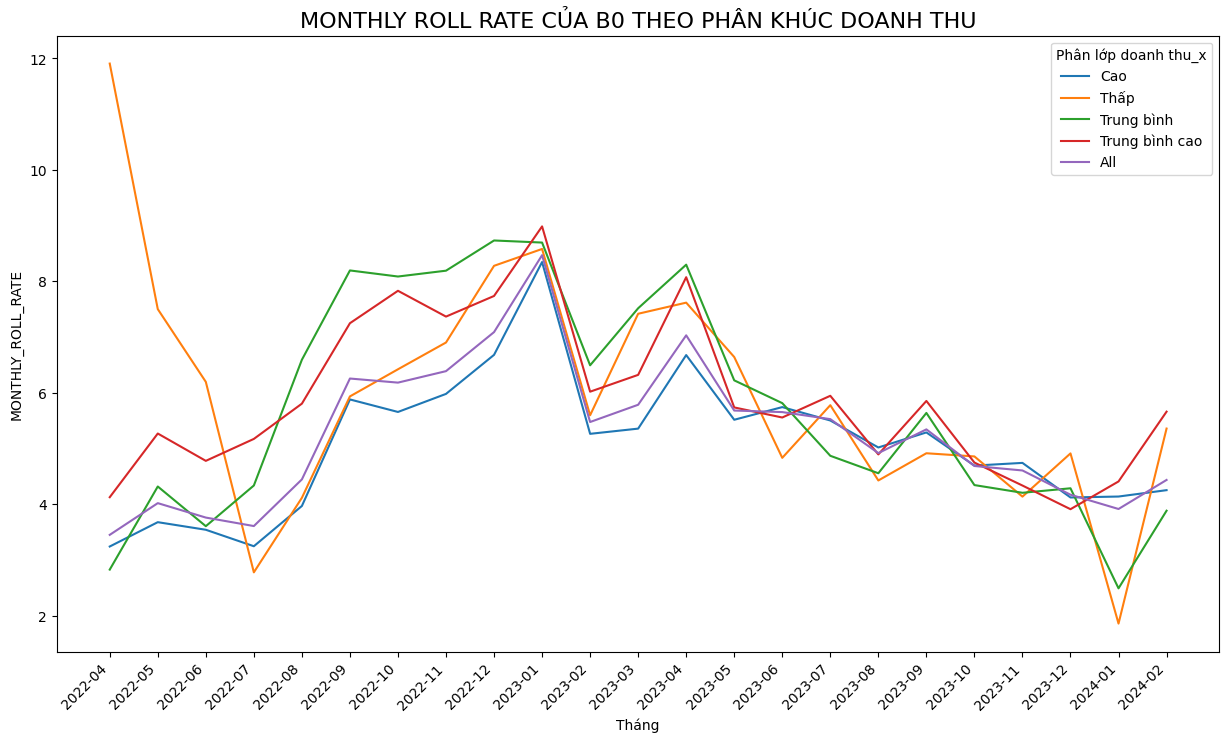

In [36]:
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=temp14,
    x='Ngày xuất data_y',
    y='MONTHLY_ROLL_RATE',
    hue='Phân lớp doanh thu_x'
)
plt.xticks(rotation=45, ha='right')
plt.title('MONTHLY ROLL RATE CỦA B0 THEO PHÂN KHÚC DOANH THU', fontsize=16)
plt.xlabel('Tháng')
plt.show()

**5. Cohort / Vintage Analysis – Cumulative Bad Rate**
---
Theo dõi tỷ lệ nợ xấu tích lũy theo cohort giải ngân





In [37]:
#Tạo bảng dữ liệu con (subset) từ merged_origin_repayment,
# chỉ giữ lại các cột PHỤC VỤ PHÂN TÍCH QUÁ HẠN theo thời gian, bao gồm:
# - ID hợp đồng: định danh khoản vay
# - Ngày thanh toán: thời điểm quan sát / kỳ dữ liệu
# - Thanh toán (tháng): MOB – số tháng kể từ khi giải ngân
# - Số ngày quá hạn hợp đồng: mức độ quá hạn (DPD)
buf = merged_origin_repayment.loc[
    :, ['ID hợp đồng', 'Ngày thanh toán', 'Thanh toán (tháng)', 'Số ngày quá hạn hợp đồng']
]



In [38]:
buf = merged_origin_repayment[
    merged_origin_repayment['Số ngày quá hạn hợp đồng'] >= 30
].copy().groupby(
    by=['Ngày thanh toán', 'Thanh toán (tháng)'],
    as_index=False
)['ID hợp đồng'].nunique()

buf1 = merged_origin_repayment.copy().groupby(
    by=['Ngày thanh toán', 'Thanh toán (tháng)'],
    as_index=False
)['ID hợp đồng'].nunique()

buf2 = buf.merge(
    right=buf1,
    on=['Ngày thanh toán', 'Thanh toán (tháng)']
)

buf2['CUMULATIVE_BAD_RATE'] = (
    buf2['ID hợp đồng_x'] /
    buf2['ID hợp đồng_y'] * 100
)

buf3 = buf2.pivot(
    index='Ngày thanh toán',
    columns='Thanh toán (tháng)',
    values='CUMULATIVE_BAD_RATE'
)

buf3


Thanh toán (tháng),1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00
Ngày thanh toán,,,,,,,,,,,,
2022-02,2.55,2.55,13.38,19.11,26.75,26.11,34.39,35.67,40.13,39.49,46.50,51.59
2022-03,0.23,3.03,7.59,12.72,18.01,22.05,26.81,30.98,34.79,38.99,43.11,47.08
2022-04,NaN,2.72,8.02,12.11,18.52,23.71,28.16,32.40,36.87,41.77,45.25,48.57
2022-05,NaN,0.49,1.46,3.60,10.58,15.95,21.53,27.32,32.35,36.83,41.02,44.94
2022-06,0.04,0.96,2.87,8.63,15.19,21.03,26.58,32.02,36.03,39.49,42.72,46.12
2022-07,0.02,1.32,6.80,11.96,17.68,23.50,28.43,33.15,37.16,40.93,44.30,47.40
2022-08,NaN,4.38,9.14,13.55,20.21,26.28,30.79,34.74,38.12,41.12,43.91,46.66
2022-09,NaN,5.17,11.11,16.61,23.32,28.40,32.62,36.30,39.11,41.95,44.60,46.98
2022-10,NaN,4.32,10.87,16.21,22.25,27.36,31.72,34.78,38.39,41.22,43.64,46.09


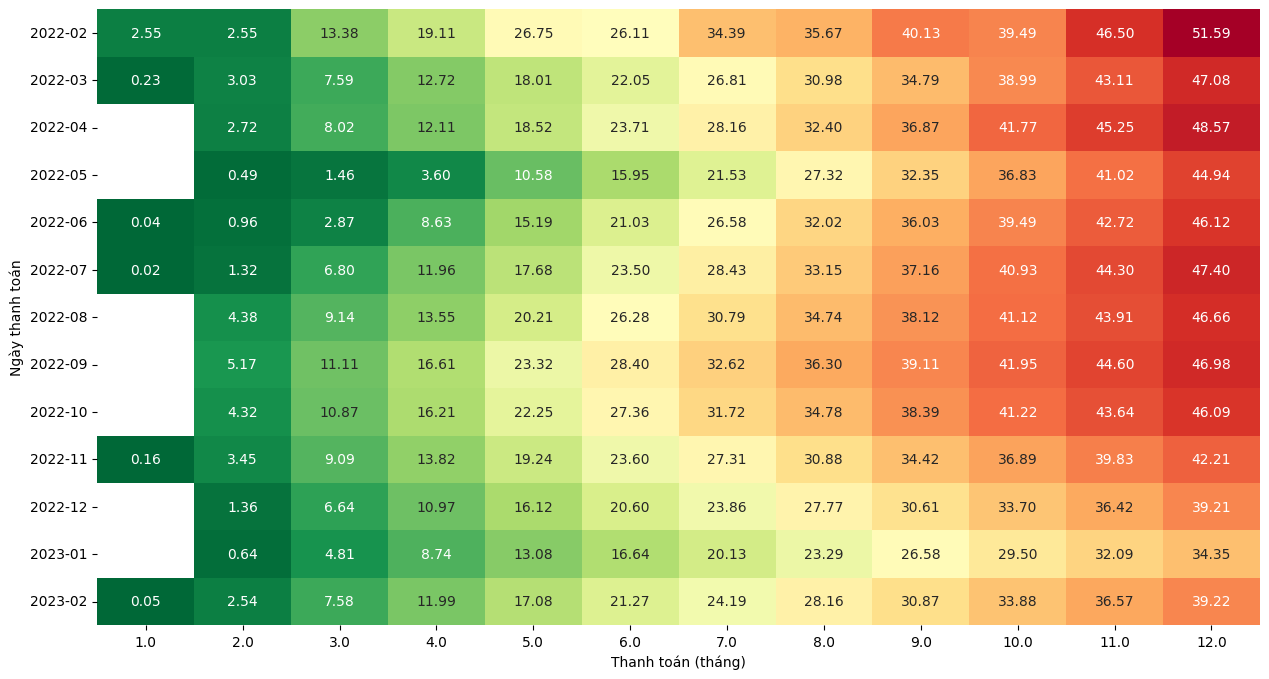

In [39]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    data=buf3,
    cmap='RdYlGn_r',
    annot=True,
    fmt='.2f',
    cbar=False
)
plt.show()


In [40]:
def vintage_analysis(
    dataset: pd.DataFrame,
    dpd: int,
    time_hierarchy: str
) -> None:

    buf = dataset[dataset['Ngày thanh toán'].notna()].copy()

    buf['QUÝ_GIẢI_NGÂN'] = np.where(
        buf['Ngày thanh toán'].str.split('-').str[1].astype(int) <= 3, 'Q1',
        np.where(
            buf['Ngày thanh toán'].str.split('-').str[1].astype(int) <= 6, 'Q2',
            np.where(
                buf['Ngày thanh toán'].str.split('-').str[1].astype(int) <= 9, 'Q3',
                'Q4'
            )
        )
    )

    buf['QUÝ_GIẢI_NGÂN'] = (
        buf['Ngày thanh toán'].str.split('-').str[0]
        + '-' + buf['QUÝ_GIẢI_NGÂN']
    )

    buf1 = buf[
        buf['Số ngày quá hạn hợp đồng'] >= dpd
    ].groupby(
        by=['QUÝ_GIẢI_NGÂN', 'Thanh toán (tháng)'],
        as_index=False
    )['ID hợp đồng'].nunique()

    buf2 = buf.groupby(
        by=['QUÝ_GIẢI_NGÂN', 'Thanh toán (tháng)'],
        as_index=False
    )['ID hợp đồng'].nunique()

    buf3 = buf1.merge(
        right=buf2,
        on=['QUÝ_GIẢI_NGÂN', 'Thanh toán (tháng)']
    )

    buf3['CUMULATIVE_BAD_RATE'] = (
        buf3['ID hợp đồng_x'] /
        buf3['ID hợp đồng_y'] * 100
    )

    buf3.loc[
        :, ['QUÝ_GIẢI_NGÂN', 'Thanh toán (tháng)', 'CUMULATIVE_BAD_RATE']
    ].to_excel(f'vintage_analysis_{dpd}.xlsx', index=False)

    plt.figure(figsize=(13, 10))
    sns.lineplot(
        data=buf3,
        x='Thanh toán (tháng)',
        y='CUMULATIVE_BAD_RATE',
        hue='QUÝ_GIẢI_NGÂN',
        marker='o',
        errorbar=None
    )
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title(f'VINTAGE ANALYSIS ({dpd} DPD)', fontsize=16)
    plt.ylabel('CUMULATIVE_BAD_RATE')
    plt.xticks(ticks=range(1, 13))
    plt.show()


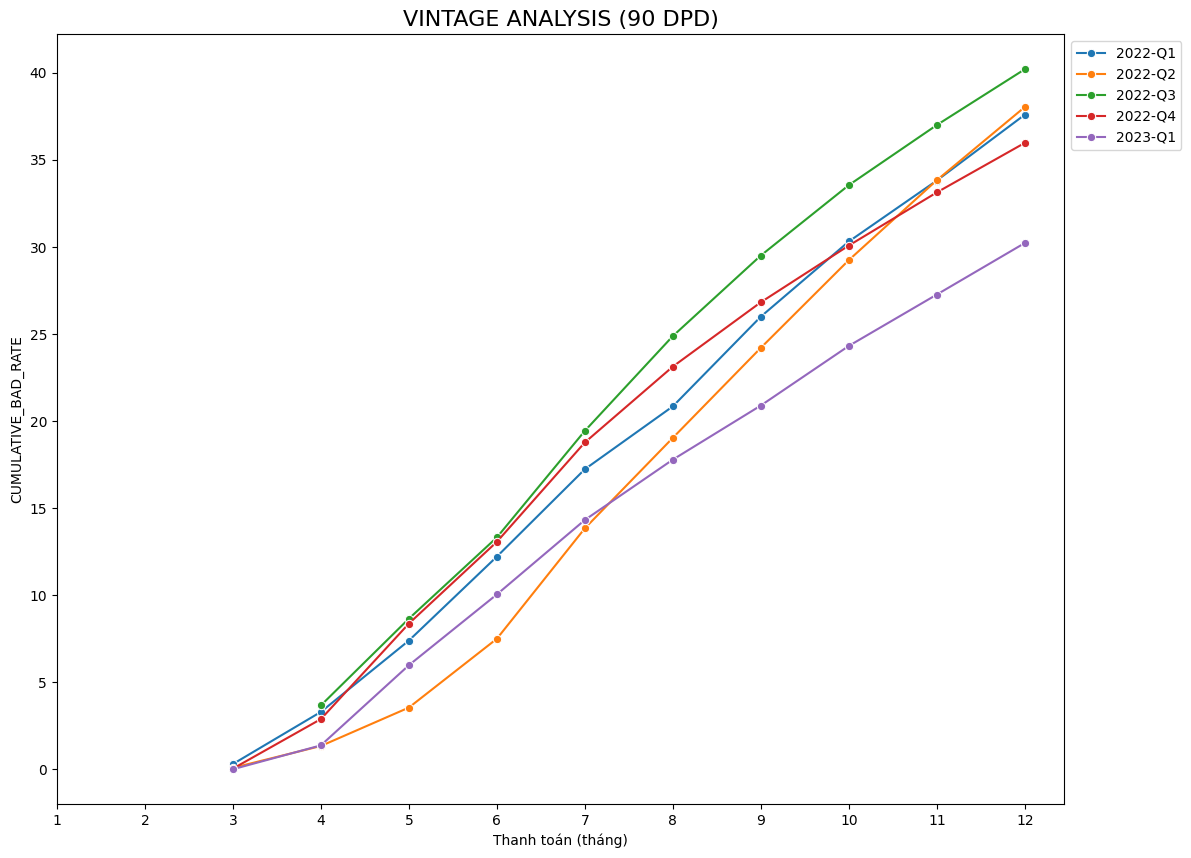

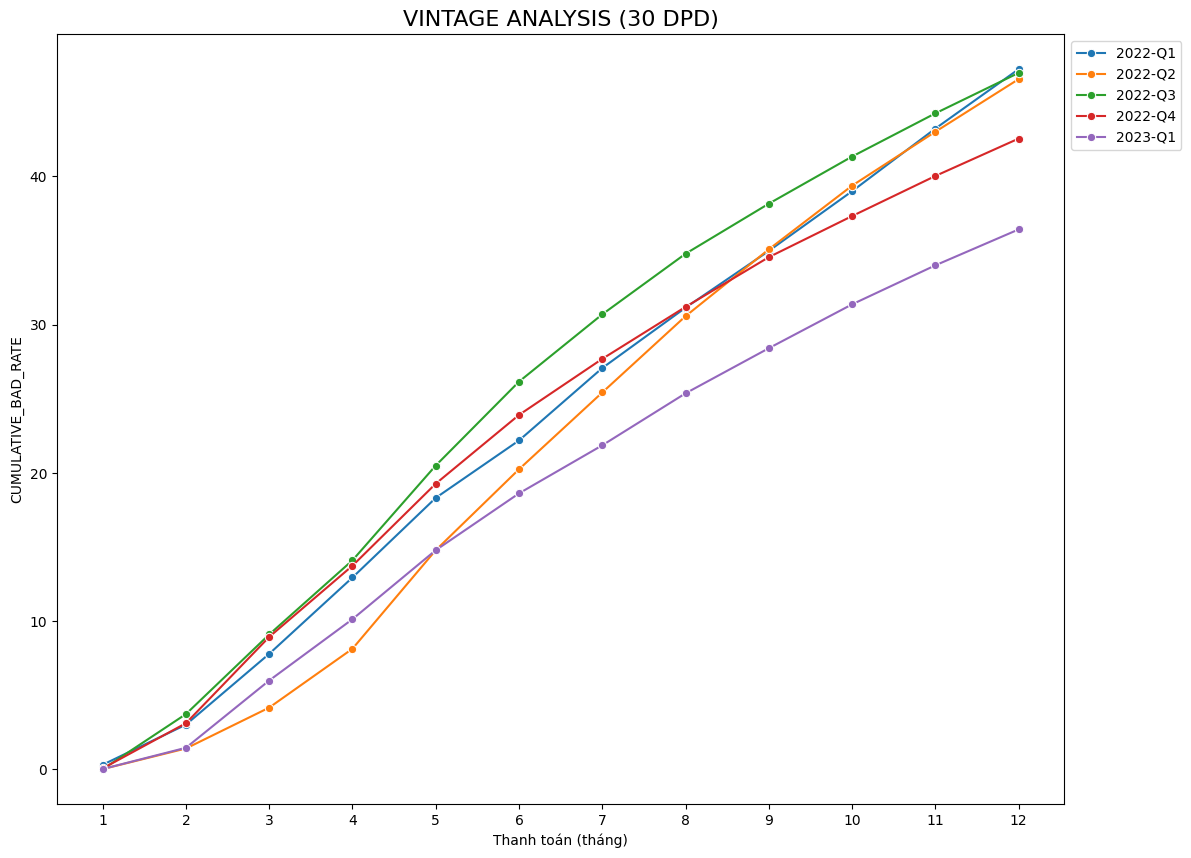

In [41]:
vintage_analysis(merged_origin_repayment, 90, 'quarter')
vintage_analysis(merged_origin_repayment, 30, 'quarter')